In [399]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

# Topic Models

In [400]:
es = pd.read_csv('data/spx.csv')
es.Date = pd.to_datetime(es.Date)
es.set_index('Date', inplace=True)
#date_range = es['2011-12-30':'2020-5-31'].index

es['return'] = np.roll(es['Close'].pct_change(),-1)
#es['5d_ret'] = es.Close.pct_change().rolling(5).sum()
#es['200d_ret'] = es.Close.pct_change().rolling(200).sum()
#es = es.loc['2012-01-04':'2020-5-29']
es

,Close,return
Date,,
2006-01-03,1182.00,0.003596
2006-01-04,1186.25,-0.000421
2006-01-05,1185.75,0.010120
2006-01-06,1197.75,0.004174
2006-01-09,1202.75,-0.000416
...,...,...
2020-06-24,3040.25,0.010690
2020-06-25,3072.75,-0.023106
2020-06-26,3001.75,0.013909


In [6]:
features[['daily_average', 'daily_average_fintwit', 'daily_average_news',
       'daily_average_politics', 'daily_average_trader',
       'topic_coherence', 'topic_coherence_diff', 'recon_ratio']]

,daily_average,daily_average_fintwit,daily_average_news,daily_average_politics,daily_average_trader,topic_coherence,topic_coherence_diff,recon_ratio
Date,,,,,,,,
2012-04-01,-0.266243,-0.334767,-0.166645,-0.239557,-0.336303,0.744901,0.898953,0.002581
2012-05-01,-0.337371,-0.384344,-0.291280,-0.243320,-0.368697,0.644985,0.845906,0.004651
2012-06-01,-0.325877,-0.355626,-0.321614,-0.214214,-0.354338,0.729873,0.811649,0.005132
2012-09-01,-0.252546,-0.257554,-0.255376,-0.235941,-0.223905,0.670430,0.847776,0.009600
2012-10-01,-0.302168,-0.332257,-0.267115,-0.251730,-0.336150,0.686796,0.872777,0.002024
...,...,...,...,...,...,...,...,...
2020-05-22,-0.253020,-0.252198,-0.293804,-0.203445,-0.207843,0.707392,0.917608,0.005151
2020-05-26,-0.207086,-0.228573,-0.227329,-0.135577,-0.183169,0.657953,0.925214,0.006251
2020-05-27,-0.273786,-0.289272,-0.289738,-0.199586,-0.266116,0.693526,0.922488,0.002160


In [314]:
sentiment_features = pd.read_csv('data/sentiment_features.csv')
nmf_features = pd.read_csv('data/nmf_features.csv')

In [321]:
pd.to_datetime(nmf_features.Date[-50:], dayfirst=True)

2044   2020-03-19
2045   2020-03-20
2046   2020-03-23
2047   2020-03-24
2048   2020-03-25
2049   2020-03-26
2050   2020-03-27
2051   2020-03-30
2052   2020-03-31
2053   2020-04-01
2054   2020-04-02
2055   2020-04-03
2056   2020-04-06
2057   2020-04-07
2058   2020-04-08
2059   2020-04-09
2060   2020-04-13
2061   2020-04-14
2062   2020-04-15
2063   2020-04-16
2064   2020-04-17
2065   2020-04-20
2066   2020-04-21
2067   2020-04-22
2068   2020-04-23
2069   2020-04-24
2070   2020-04-27
2071   2020-04-28
2072   2020-04-29
2073   2020-04-30
2074   2020-05-01
2075   2020-05-04
2076   2020-05-05
2077   2020-05-06
2078   2020-05-07
2079   2020-05-08
2080   2020-05-11
2081   2020-05-12
2082   2020-05-13
2083   2020-05-14
2084   2020-05-15
2085   2020-05-18
2086   2020-05-19
2087   2020-05-20
2088   2020-05-21
2089   2020-05-22
2090   2020-05-26
2091   2020-05-27
2092   2020-05-28
2093   2020-05-29
Name: Date, dtype: datetime64[ns]

In [443]:
sentiment_features = pd.read_csv('data/sentiment_features.csv')
nmf_features = pd.read_csv('data/nmf_features.csv')

sentiment_features = sentiment_features.iloc[1:].reset_index(drop=True)
features = nmf_features.copy()
features.Date = pd.to_datetime(features.Date, dayfirst=True)
features.set_index('Date', inplace=True)
sentiment_features.index = features.index
features = sentiment_features.join(features).drop(['Date'],axis=1)
features.index = pd.to_datetime(features.index)
features.sort_index(inplace=True)

#features['5d_ret'] = es['5d_ret'][features.index]
#features['200d_ret'] = es['200d_ret'][features.index]

#features.daily_average_fintwit = features.daily_average_fintwit - features.daily_average
#features.daily_average_news = features.daily_average_news - features.daily_average
#features.daily_average_politics = features.daily_average_politics - features.daily_average
#features.daily_average_trader = features.daily_average_trader - features.daily_average

#features.drop(['daily_average_politics', 'recon_ratio'],axis=1, inplace=True)


es = es.loc['2012-01-04':'2020-5-29']

In [398]:
features

,daily_average,daily_average_fintwit,daily_average_news,daily_average_trader,num_tweets,topic_coherence,topic_coherence_diff
Date,,,,,,,
2012-01-04,-0.266243,-0.068523,0.099599,-0.070060,1.000000,0.744901,0.898953
2012-01-05,-0.337371,-0.046973,0.046091,-0.031326,1.000000,0.644985,0.845906
2012-01-06,-0.325877,-0.029749,0.004263,-0.028461,1.000000,0.729873,0.811649
2012-01-09,-0.252546,-0.005009,-0.002830,0.028641,1.000000,0.670430,0.847776
2012-01-10,-0.302168,-0.030089,0.035053,-0.033982,1.000000,0.686796,0.872777
...,...,...,...,...,...,...,...
2020-05-22,-0.253020,0.000822,-0.040784,0.045177,1.050272,0.707392,0.917608
2020-05-26,-0.207086,-0.021487,-0.020243,0.023917,1.139891,0.657953,0.925214
2020-05-27,-0.273786,-0.015486,-0.015952,0.007669,1.020055,0.693526,0.922488


In [444]:


#features.daily_average_fintwit = features.daily_average_fintwit - features.daily_average
#features.daily_average_trader = features.daily_average_trader - features.daily_average_fintwit

date = '2018-12-31'


es_class = 1*(es['return'] >0)

X = features[:date]
y = es_class[:date]

In [403]:
tscv= TimeSeriesSplit(n_splits=5)

logloss = pd.DataFrame(index = range(6,21), columns=['rf', 'boost'])
rocauc = pd.DataFrame(index = range(6,21), columns=['rf', 'boost'])

for max_depth in range(6,21):
    rf_logloss = []
    boost_logloss = []
    
    rf_rocauc = []
    boost_rocauc = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = RandomForestClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
        clf.fit(X_train, y_train)
        rf_logloss.append(log_loss(clf.predict(X_test), y_test))
        rf_rocauc.append(roc_auc_score(clf.predict(X_test), y_test))
         
        clf = GradientBoostingClassifier(max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)
        boost_logloss.append(log_loss(clf.predict(X_test), y_test))
        boost_rocauc.append(roc_auc_score(clf.predict(X_test), y_test))
        
    logloss.loc[max_depth, 'rf'] = np.mean(rf_logloss)
    logloss.loc[max_depth, 'boost'] = np.mean(boost_logloss)
    
            
    rocauc.loc[max_depth, 'rf'] = np.mean(rf_rocauc)
    rocauc.loc[max_depth, 'boost'] = np.mean(boost_rocauc)

In [404]:
logloss

,rf,boost
6,16.4358,16.8884
7,16.4596,17.079
8,16.412,16.9599
9,16.6978,16.3644
10,16.5072,17.1028
11,16.7931,17.0313
12,16.5787,17.1504
13,17.0789,17.2696
14,16.412,17.4601
15,16.3882,17.1505


In [350]:
rocauc

,rf,boost
6,0.507993,0.498805
7,0.514078,0.50142
8,0.504645,0.494904
9,0.49818,0.51637
10,0.49714,0.521124
11,0.498941,0.513581
12,0.492397,0.479643
13,0.492695,0.500377
14,0.495386,0.492465
15,0.475952,0.511197


In [445]:
date = '2018-12-31'

X_train = features[:date]
X_test = features[date:]

y = 1*(es['return'] >0)

y_train = y[:date]
y_test = y[date:]

clf = RandomForestClassifier(max_depth=15, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


sharpe_ratio(clf.predict(X_test), es['return'][date:])

1.496997241276337

In [448]:
X_train.columns

Index(['daily_average', 'daily_average_fintwit', 'daily_average_news',
       'daily_average_politics', 'daily_average_trader', 'num_tweets',
       'topic_coherence', 'topic_coherence_diff', 'recon_ratio'],
      dtype='object')

In [484]:
CCC.loc[['daily_average', 'daily_average_fintwit', 'daily_average_news',
        'daily_average_trader', 'num_tweets',
       'topic_coherence', 'topic_coherence_diff', 'recon_ratio']]

,feature_importances
daily_average,0.106329
daily_average_fintwit,0.104453
daily_average_news,0.113299
daily_average_trader,0.106285
num_tweets,0.108552
topic_coherence,0.125383
topic_coherence_diff,0.114687
recon_ratio,0.110767


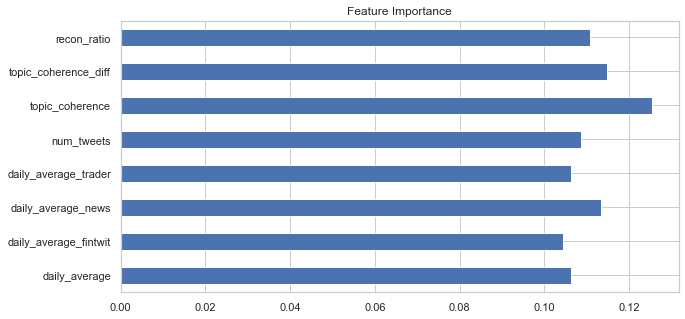

In [486]:
CCC = pd.DataFrame(columns=['feature_importances'], index = X_train.columns)
CCC['feature_importances'] = clf.feature_importances_
#CCC.plot.barh(figsize=(10,5), legend=False, title="Feature Importance")
CCC.loc[['daily_average', 'daily_average_fintwit', 'daily_average_news',
        'daily_average_trader', 'num_tweets',
       'topic_coherence', 'topic_coherence_diff', 'recon_ratio']].plot.barh(figsize=(10,5), legend=False, title="Feature Importance")

In [458]:
!pip install seaborn

     |████████████████████████████████| 215 kB 3.1 MB/s eta 0:00:01


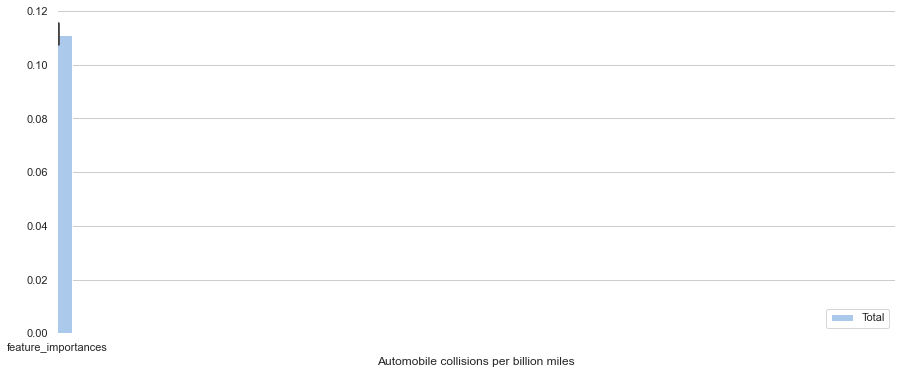

In [473]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(data=CCC, label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [406]:
clf = GradientBoostingClassifier(max_depth=9, random_state=42)
clf.fit(X_train, y_train)
clf.feature_importances_

sharpe_ratio(clf.predict(X_test), es['return'][date:])

0.7976151444248708

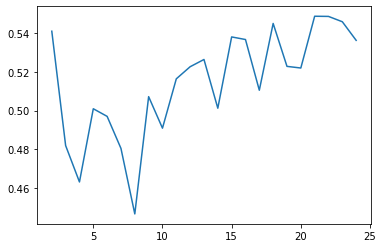

In [201]:
scores = []
f1scores = []
roc = []

for i in range(2,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    f1scores.append(f1_score(clf.predict(X_test),y_test))
    roc.append(roc_auc_score(clf.predict(X_test),y_test))

plt.plot(range(2,25),roc)

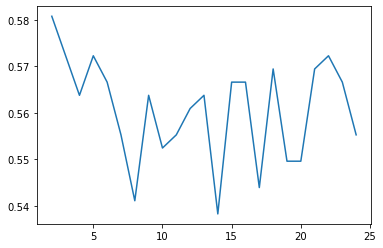

In [203]:
plt.plot(range(2,25),scores)

In [63]:
clf = GradientBoostingClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
clf.feature_importances_

sharpe_ratio(clf.predict(X_test), es['return'][date:])

0.25664124264489846

In [277]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [331]:
np.sqrt(252) * es['return'][date:].mean()/es['return'][date:].std()

0.6295221225435782

In [27]:
sharpe_ratio(clf.predict(X_test), es['return'][date:])

0.7492638240701683

In [332]:
np.sqrt(252) *(clf.predict(X_test) * es['return'][date:]).mean()/(clf.predict(X_test) * es['return'][date:]).std()

1.256383235658911

In [333]:
np.sqrt(252) *((2*clf.predict(X_test)-1) * es['return'][date:]).mean()/((2*clf.predict(X_test)-1)  * es['return'][date:]).std()

1.3392198484129394

In [17]:
def sharpe_ratio(pos, ret):
    return np.sqrt(252) * ( pos * ret ).mean() / ( pos * ret ).std()

In [407]:
rf_sharpe = []
rf_short_sharpe = []
boost_sharpe = []
boost_short_sharpe = []
es_sharpe = []
rf_pos = []
boost_pos = []
rf_pos_short = []
boost_pos_short = []

rf_position = []
boost_position = []

X = features[:date]
y = es_class[:date]

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    es_sharpe.append(sharpe_ratio(1,es['return'][test_index]))
    

    clf = RandomForestClassifier(max_depth=15, criterion='entropy',random_state= 42)
    clf.fit(X_train, y_train)
    rf_sharpe.append(sharpe_ratio(clf.predict(X_test), es['return'][test_index]))
    #rf_short_sharpe.append(sharpe_ratio(2 * clf.predict(X_test) - 1, es['return'][test_index]))
    rf_pos_short.append((2 * clf.predict(X_test) - 1)*es['return'][test_index])
    rf_pos.append(clf.predict(X_test)*es['return'][test_index])
    rf_position.append(clf.predict(X_test))
    
    clf = GradientBoostingClassifier(max_depth=9,random_state= 42)
    clf.fit(X_train, y_train)
    boost_sharpe.append(sharpe_ratio(clf.predict(X_test), es['return'][test_index]))
    boost_pos.append(clf.predict(X_test)*es['return'][test_index])
    boost_position.append(clf.predict(X_test))
    boost_pos_short.append((2 * clf.predict(X_test) - 1)*es['return'][test_index])
    #boost_short_sharpe.append(sharpe_ratio(2 * clf.predict(X_test) - 1, es['return'][test_index]))
    #pos.append((2 * clf.predict(X_test) - 1)*es['return'][test_index])
    #boost_short_sharpe.append(sharpe_ratio(xxx, es['return'][test_index]))
#print(np.sqrt(252)*pd.concat(rf_pos).mean()/pd.concat(rf_pos).std())
#print(np.sqrt(252)*pd.concat(boost_pos).mean()/pd.concat(boost_pos).std())
#boost_short_sharpe
#A = pd.concat(boost_pos) + pd.concat(rf_pos)
#print(np.sqrt(252)*A.mean()/A.std())

X_train = features[:date]
X_test = features[date:]

y = 1*(es['return'] >0)

y_train = y[:date]
y_test = y[date:]

clf = RandomForestClassifier(max_depth=15, criterion='entropy',random_state= 42)
clf.fit(X_train, y_train)
rf_sharpe.append(sharpe_ratio(clf.predict(X_test), es['return'][date:]))
#rf_short_sharpe.append(sharpe_ratio(2 * clf.predict(X_test) - 1, es['return'][test_index]))
rf_pos.append(clf.predict(X_test)*es['return'][date:])
rf_pos_short.append((2 * clf.predict(X_test) - 1)*es['return'][date:])
rf_position.append(clf.predict(X_test))
    
clf = GradientBoostingClassifier(max_depth=9,random_state= 42)
clf.fit(X_train, y_train)
boost_sharpe.append(sharpe_ratio(clf.predict(X_test), es['return'][date:]))
boost_pos.append(clf.predict(X_test)*es['return'][date:])
boost_pos_short.append((2 * clf.predict(X_test) - 1)*es['return'][date:])
boost_position.append(clf.predict(X_test))

es_sharpe.append(sharpe_ratio(1,es['return'][date:]))

rf_pos = pd.concat(rf_pos)
boost_pos = pd.concat(boost_pos)
rf_pos_short = pd.concat(rf_pos_short)
boost_pos_short = pd.concat(boost_pos_short)

rf_position = np.concatenate(rf_position)
boost_position = np.concatenate(boost_position)



print(np.sqrt(252)*rf_pos.mean()/rf_pos.std())
print(np.sqrt(252)*boost_pos.mean()/boost_pos.std())
np.sqrt(252)*es.iloc[291:]['return'].mean()/es.iloc[291:]['return'].std()

0.809364038630355
0.5950861248148769


0.6909599556600211

In [409]:
print(np.sqrt(252)*rf_pos_short.mean()/rf_pos_short.std())
print(np.sqrt(252)*boost_pos_short.mean()/boost_pos_short.std())

0.7070949895559995
0.25420401900061207


In [439]:
B = pd.DataFrame(index=['SPX','RF','GradBoost'],
            columns=['Accuracy', 'F1', 'Sharpe Total', 'Sharpe Test', 'Days Long'])

In [442]:
B.loc['SPX','Sharpe Total'] = np.sqrt(252)*es.iloc[291:]['return'].mean()/es.iloc[291:]['return'].std()
B.loc['RF', 'Sharpe Total'] = np.sqrt(252)*rf_pos.mean()/rf_pos.std()
B.loc['GradBoost', 'Sharpe Total'] = np.sqrt(252)*boost_pos.mean()/boost_pos.std()

B.loc['SPX','Accuracy'] = accuracy_score(y.iloc[291:]*0 + 1, y.iloc[291:])
B.loc['RF', 'Accuracy'] = accuracy_score(rf_position, y.iloc[291:])
B.loc['GradBoost', 'Accuracy'] = accuracy_score(boost_position, y.iloc[291:])

B.loc['SPX','F1'] = ''
B.loc['RF', 'F1'] = f1_score(rf_position, y.iloc[291:])
B.loc['GradBoost', 'F1'] = f1_score(boost_position, y.iloc[291:])

B.loc['SPX','Sharpe Test'] = es_sharpe[-1]
B.loc['RF', 'Sharpe Test'] = rf_sharpe[-1]
B.loc['GradBoost', 'Sharpe Test'] = boost_sharpe[-1]


B.loc['SPX', 'Days Long'] = 1
B.loc['RF', 'Days Long'] = rf_position.sum()/len(rf_position)
B.loc['GradBoost', 'Days Long'] = boost_position.sum()/len(boost_position)

B

,Accuracy,F1,Sharpe Total,Sharpe Test,Days Long
SPX,0.549085,,0.69096,0.629522,1
RF,0.544648,0.646882,0.809364,1.34748,0.740433
GradBoost,0.520244,0.600831,0.595086,0.797615,0.652801


In [430]:
B.loc['SPX',[ 'Sharpe1', 'Sharpe1', 'Sharpe3', 'Sharpe4', 'Sharpe5', 'Sharpe Test']]

Sharpe1        NaN
Sharpe1        NaN
Sharpe1        NaN
Sharpe1        NaN
Sharpe3        NaN
Sharpe4        NaN
Sharpe5        NaN
Sharpe Test    NaN
Name: SPX, dtype: object

In [424]:
B

,Accuracy,Sharpe,F1,Sharpe1,Sharpe1,Sharpe3,Sharpe4,Sharpe5
SPX,NaN,0.69096,NaN,NaN,NaN,NaN,NaN,NaN
RF,NaN,0.809364,NaN,NaN,NaN,NaN,NaN,NaN
GradBoost,NaN,0.595086,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
accuracy_score(y.iloc[291:]*0 + 1, y.iloc[291:])

0.5490848585690515

In [412]:
accuracy_score(boost_position, y.iloc[291:])

0.5202440377149196

In [413]:
accuracy_score(rf_position, y.iloc[291:])

0.5446478092068774

In [417]:
f1_score(y.iloc[291:]*0 , y.iloc[291:])

0.0

In [415]:
f1_score(rf_position, y.iloc[291:])

0.6468817204301075

In [416]:
f1_score(boost_position, y.iloc[291:])

0.6008306414397785

In [121]:
A = pd.concat(boost_pos) + pd.concat(rf_pos)
print(np.sqrt(252)*A.mean()/A.std())

0.5190313279936253


In [418]:
rf_sharpe

[0.9168147787103824,
 0.7211503006517799,
 -0.0334296846300871,
 3.0115426594964396,
 -0.2055370103599661,
 1.3474779705063613]

In [419]:
es_sharpe

[1.5980227868028245,
 0.8385901617865291,
 0.5025459568821748,
 1.986775010089803,
 -0.09867061221641316,
 0.6295221225435782]

In [420]:
boost_sharpe

[1.4258975220541483,
 0.8684322824789471,
 0.18974482544544682,
 2.5431530333535965,
 -0.7700340651633997,
 0.7976151444248708]

In [578]:
es[:date].Close[-1]/es[:date].Close[0]

2.2071932921447486

In [132]:
np.sqrt(252)*es[:date]['return'].mean()/es[:date]['return'].std()

0.9294254163799011

In [448]:
np.sqrt(252)*pd.concat(pos).mean()/pd.concat(pos).std()

0.5890310312592486

In [386]:
xxx

array([-1,  0,  0,  1,  1,  0,  0, -1,  0,  1,  1,  0,  1,  0,  1,  1,  1,
       -1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,
        0,  0,  0,  1, -1, -1, -1, -1,  0, -1,  0,  1,  0,  0,  1,  0,  1,
       -1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,
        0, -1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0, -1,
        0,  0, -1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,
        0,  1,  1,  0, -1,  1,  1,  1, -1,  0,  1,  1,  0,  0,  1,  1,  0,
        1,  1,  0,  0, -1,  0,  1,  0,  1,  0,  0, -1, -1,  1, -1,  1, -1,
        0,  1,  0,  1,  0,  1,  1,  1,  0,  0, -1,  0,  0,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  0,  0,  1, -1,  0,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  0,  0, -1,  1,  1,  1, -1,  0,  1,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0

In [404]:
boost_sharpe

[1.8282674136479558,
 1.2114199008104785,
 -0.5224557922369265,
 1.9121854951518753,
 -0.12536340442508867]

In [405]:
boost_short_sharpe

[1.2082056334047226,
 1.1268051991824712,
 -1.3645252431553334,
 1.1691640995129333,
 -0.10966892199178181]

In [393]:
boost_sharpe

[1.894866357767145,
 1.7050300332822121,
 0.8495393606482361,
 1.8207356148048028,
 -0.3410830213230515]

In [325]:
rf_sharpe

[0.9922527198068224,
 0.627887887058299,
 0.5061612459166006,
 1.808958265717635,
 -0.2795214894642947]

In [156]:
(1 + es['return'][date:]).cumprod()

Date
2018-12-31    1.000500
2019-01-02    0.975407
2019-01-03    1.009297
2019-01-04    1.016395
2019-01-07    1.025992
                ...   
2020-05-22    1.190243
2020-05-26    1.207638
2020-05-27    1.205638
2020-05-28    1.210337
2020-05-29    1.216135
Name: return, Length: 353, dtype: float64

In [ ]:
es = pd.read_csv('data/ES.csv')
es = es[es.Time == '15:00'][['Date','Time','Close']]
es.Date = pd.to_datetime(es.Date +' ' +'15:45')
es.drop('Time',axis=1,inplace=True)
es.set_index('Date', inplace=True)

date_range = es['2011-12-30':'2020-5-31'].index

es['Post'] = np.roll(es['Close'].pct_change(),-1)

plt.plot(es['Close'])

import statsmodels.api as sm

X_train = nmf_features[:'2016-12-31']
X_test = nmf_features['2016-12-31':]

y = 1*(y >0)

y_train = y[:'2016-12-31']
y_test = y['2016-12-31':]




scores = []
f1scores = []
roc = []
for i in range(2,16):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    f1scores.append(f1_score(clf.predict(X_test),y_test))
    roc.append(roc_auc_score(clf.predict(X_test),y_test))
#clf.score(X_train, y_train)

clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

clf.feature_importances_

plt.plot(range(2,16),roc)

# Sentiment

In [ ]:
X_train = user_features[:'2016-12-31']
X_test = user_features['2016-12-31':]

y_vader = y[~user_features['PipCzar'].isnull()]
X_vader = user_features['PipCzar'][~user_features['PipCzar'].isnull()]

X_vader_train = X_vader[:'2016-12-31']
X_vader_test = X_vader['2016-12-31':]

y_vader_train = y_vader[:'2016-12-31']
y_vader_test = y_vader['2016-12-31':]

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(np.array(X_vader_train).reshape(-1, 1), y_vader_train)
clf.score(np.array(X_vader_test).reshape(-1, 1), y_vader_test)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)




X_train = user_features[:'2016-12-31']
X_test = user_features['2016-12-31':]

y = es['Post'].loc[sentiment_features[['daily_average']].index]
y = 1*(y >0)

y_train = y[:'2016-12-31']
y_test = y['2016-12-31':]

models = []

for handle in user_features.columns:
    mask = ~user_features[handle].isnull()
    if mask.sum() >= 300:
        X_handle = np.array(user_features[handle][mask]).reshape(-1,1)
        y_handle = y[mask] 
        clf = LogisticRegression(random_state=0).fit(X_handle, y_handle)
        models.append((handle, float(clf.coef_), clf.score(X_handle, y_handle) ))
 

xxx = pd.DataFrame(models, columns=['handle','coef','score']).sort_values(by=['score'])[-100:]